<a href="https://colab.research.google.com/github/sarjakpatel/AIRoyal/blob/master/AirQualityPredictionUsingPCA%26FeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/AirQualityUCI.xlsx')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=data.drop(['Date', 'Time','AH'], axis=1)

x=scaler.fit_transform(x)

y=data.AH
print(y)
x

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
9352    0.756824
9353    0.711864
9354    0.640649
9355    0.513866
9356    0.502804
Name: AH, Length: 9357, dtype: float64


array([[0.95611137, 0.69650631, 0.25197984, ..., 0.53897714, 0.87326247,
        0.86197939],
       [0.95327985, 0.66625739, 0.22462203, ..., 0.43053898, 0.87203598,
        0.85790977],
       [0.95422369, 0.7152584 , 0.20734341, ..., 0.46790928, 0.86631235,
        0.87964326],
       ...,
       [0.95516753, 0.59917401, 0.        , ..., 0.47452025, 0.92763696,
        0.75625595],
       [0.95375177, 0.53689028, 0.        , ..., 0.35616564, 0.93346279,
        0.73963114],
       [0.95422369, 0.56736243, 0.        , ..., 0.37315214, 0.93417825,
        0.73815915]])

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
x_new = pca.fit_transform(x)
x_new
pca.get_covariance()

array([[ 1.34307792e-01,  2.23501425e-03,  4.73392603e-03,
        -1.80417867e-03,  1.55590568e-03,  2.95806206e-02,
        -3.68313268e-03,  5.78469129e-02, -4.24275483e-03,
         4.93952851e-03, -4.46331709e-03, -3.13538849e-03],
       [ 2.23501425e-03,  2.16843806e-02,  2.51951554e-03,
         1.96998277e-02,  1.94846286e-02,  6.27715273e-03,
         1.42977272e-03,  5.33548442e-03,  1.95437275e-02,
         2.20539017e-02,  1.96322731e-02,  1.94692067e-02],
       [ 4.73392603e-03,  2.51951554e-03,  1.01284289e-02,
         5.89427151e-04,  1.57122179e-03, -6.80916046e-05,
         5.48902924e-04,  2.44611149e-03,  2.57121885e-03,
         1.70899330e-03, -1.34700577e-07,  1.47956849e-04],
       [-1.80417867e-03,  1.96998277e-02,  5.89427151e-04,
         2.46165586e-02,  1.70736189e-02, -2.79758808e-05,
         8.97496084e-03, -4.04849853e-04,  1.90865524e-02,
         1.68854934e-02,  2.69190854e-02,  2.57457407e-02],
       [ 1.55590568e-03,  1.94846286e-02,  1.5712217

In [6]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([4.26339499e-01, 3.51396876e-01, 1.08579248e-01, 4.84421673e-02,
       2.63196131e-02, 1.76796345e-02, 7.02717374e-03, 6.41174507e-03,
       3.97494631e-03, 2.14727986e-03, 1.55903412e-03, 1.22783648e-04])

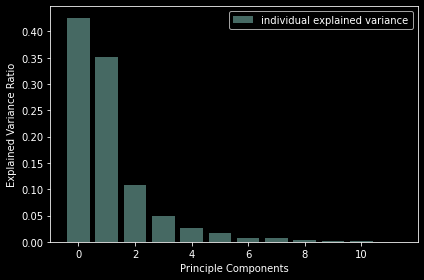

In [7]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(6,4))

  plt.bar(range(12), explained_variance, alpha=0.5, align = 'center', label = 'individual explained variance')
  plt.ylabel('Explained Variance Ratio')
  plt.xlabel('Principle Components')
  plt.legend(loc='best')
  plt.tight_layout()

In [75]:
pca=PCA(n_components=2)
x_new = pca.fit_transform(x)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(300, input_shape=(2,),activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(Adam(lr=0.1),loss='mean_squared_error')

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 300)               900       
_________________________________________________________________
dense_49 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(x_train, y_train, epochs = 100,batch_size=10)

Epoch 1/100
749/749 [==============================] - 1s 2ms/step - loss: 104.1569
Epoch 2/100
749/749 [==============================] - 1s 2ms/step - loss: 20.2146
Epoch 3/100
749/749 [==============================] - 1s 2ms/step - loss: 29.3606
Epoch 4/100
749/749 [==============================] - 1s 2ms/step - loss: 12.5637
Epoch 5/100
749/749 [==============================] - 1s 2ms/step - loss: 36.5393
Epoch 6/100
749/749 [==============================] - 1s 2ms/step - loss: 1.3608
Epoch 7/100
749/749 [==============================] - 1s 2ms/step - loss: 4.4554
Epoch 8/100
749/749 [==============================] - 1s 2ms/step - loss: 4.0721
Epoch 9/100
749/749 [==============================] - 1s 2ms/step - loss: 9.5527
Epoch 10/100
749/749 [==============================] - 1s 2ms/step - loss: 1.6270
Epoch 11/100
749/749 [==============================] - 1s 2ms/step - loss: 1.0693
Epoch 12/100
749/749 [==============================] - 1s 2ms/step - loss: 4.8048
Epoch 1

In [79]:
result = model.evaluate(x_test, y_test)
print(result)
accuracy = 1 - result
print("Accuracy : {}".format(accuracy))

59/59 [==============================] - 0s 1ms/step - loss: 0.1665
0.16653385758399963
Accuracy : 0.8334661424160004


12 Components :
Accuracy : 0.8330845236778259

8 Components :
Accuracy : 0.8333282470703125

6 Components :
Accuracy : 0.8341109305620193

4 Components :
Accuracy : 0.7969811409711838

3 Components :
Accuracy : 0.8507452756166458
             
2 Components :
Accuracy : 0.8334661424160004
